In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cv2
import imghdr

C:\Users\HP\AppData\Local\Temp\ipykernel_14676\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir ='data'
image_exts = ['jpeg','jpg', 'jfif','png']

In [5]:
for image_class in os.listdir(data_dir):  # validating images and removing correpted images
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 72 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator() #making data as iterate

In [8]:
batch = data_iterator.next()

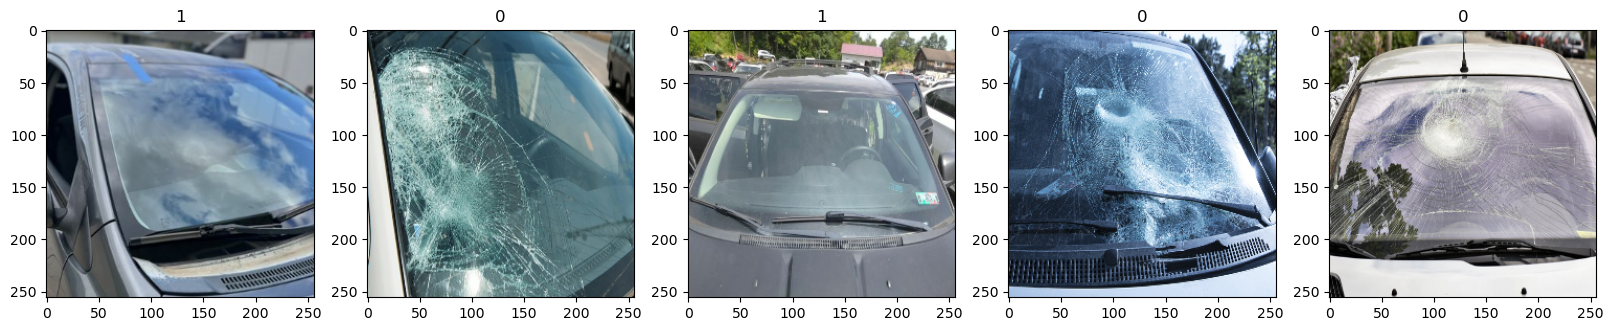

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))  #ploting and test label
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
#scale data
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.6901961 , 0.3137255 , 0.21960784],
          [0.6901961 , 0.3137255 , 0.21960784],
          [0.69411767, 0.31764707, 0.22352941],
          ...,
          [0.37165833, 0.37345776, 0.4523109 ],
          [0.37024358, 0.37416515, 0.45259652],
          [0.3632506 , 0.36717218, 0.44867495]],
 
         [[0.6901961 , 0.3137255 , 0.21960784],
          [0.6901961 , 0.3137255 , 0.21960784],
          [0.69411767, 0.31764707, 0.22352941],
          ...,
          [0.21911663, 0.21451491, 0.2876685 ],
          [0.20918351, 0.21310508, 0.28643537],
          [0.2180147 , 0.21683517, 0.29016545]],
 
         [[0.6901961 , 0.3137255 , 0.21960784],
          [0.6901961 , 0.3137255 , 0.21960784],
          [0.69411767, 0.31764707, 0.22352941],
          ...,
          [0.17515318, 0.17128694, 0.23205593],
          [0.1610146 , 0.16796875, 0.22410385],
          [0.17581189, 0.17156097, 0.23038943]],
 
         ...,
 
         [[0.10679279, 0.08718495, 0.11071436],
          [0.08591

In [13]:
#building modle
from tensorflow.keras.models import Sequential #singl input and singl output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
train_size = int(len(data)*.8) 
val_size = int(len(data)*.5)
test_size = int(len(data)*1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [21]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/20


2/2 [==============================] - 6s 1s/step - loss: 1.0422 - accuracy: 0.6562 - val_loss: 0.5216 - val_accuracy: 0.7500
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.7186 - accuracy: 0.5000 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.6724 - accuracy: 0.5000 - val_loss: 0.7750 - val_accuracy: 0.3750
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.5684 - accuracy: 0.6562 - val_loss: 0.2041 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.5361 - accuracy: 0.6562 - val_loss: 0.5259 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.4711 - accuracy: 0.6875 - val_loss: 0.3283 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.4389 - accuracy: 0.6719 - val_loss: 0.3182 - val_accuracy: 0.8750
Epoch 8/20
2/2 [=======================

In [21]:
# Evaluation

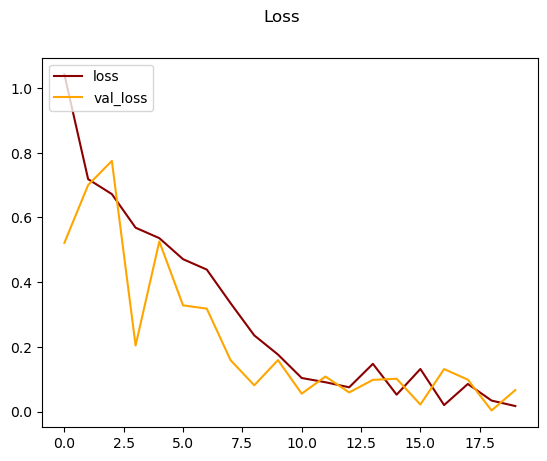

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='darkred', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc="upper left")
plt.show()

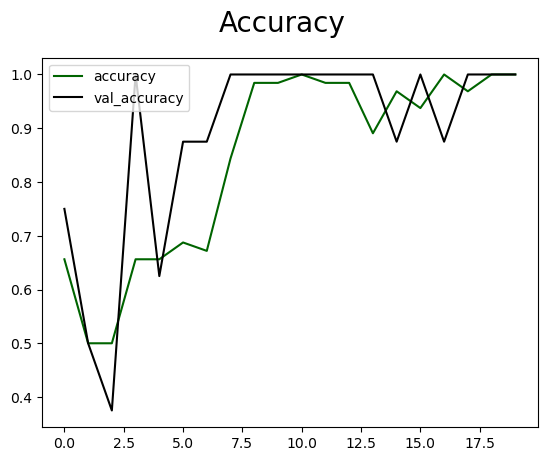

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='darkgreen', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='k', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
pwd

'C:\\Users\\HP\\Evolve\\expo'

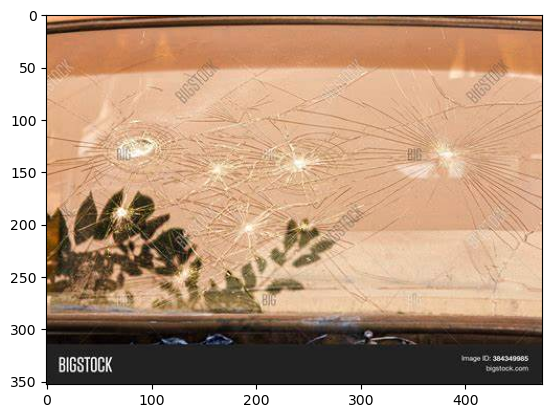

In [25]:
img = cv2.imread('OIP.jpg')
plt.imshow(img)
plt.show()

In [26]:
resize = tf.image.resize(img, (256,256))

In [27]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 244ms/step


In [28]:
yhat

array([[0.00411768]], dtype=float32)

In [29]:
if yhat > 0.5: 
    print(f'Predicted class is Not Broken = 0')
else:
    print(f'Broken = 5000')

Broken = 5000


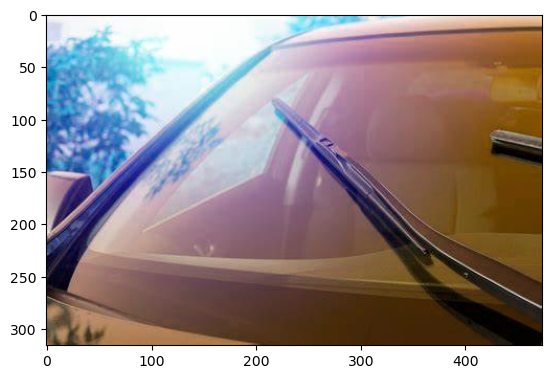

In [30]:
img = cv2.imread('notb2.jpeg')
plt.imshow(img)
plt.show()

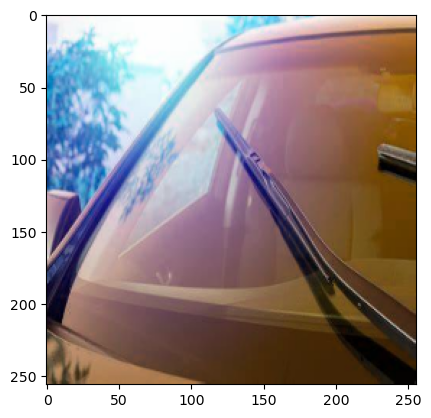

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 51ms/step


In [33]:
if yhat > 0.5: 
    print(f'Predicted class is Not Broken = 0')
else:
    print(f'Broken = 5000')

Predicted class is Not Broken = 0


In [34]:
model.save(os.path.join('models','insurance.h5'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
